<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2022</h1>
<h2>Problemes 3 - Floyd-Warshall, Cicles, Camins i Circuits Eulerians</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Recordatori: Camís més curts entre totes les parelles de nodes. Algorisme Floyd-Warshall

Suposeu que tenim el següent graf:

In [2]:
from digraph_plot import my_draw_networkx_edge_labels
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

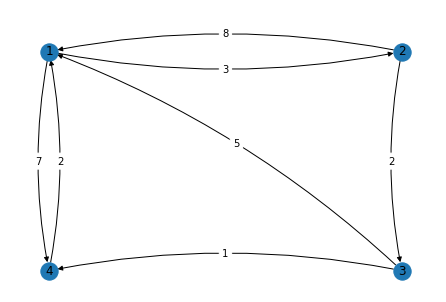

In [3]:
G = nx.DiGraph()
G.add_weighted_edges_from(((1,2,3), (1,4,7), (2,1,8), (2,3,2), (3,1,5), (3,4,1), (4,1,2)))

# Establim les posicions de cada node de forma que ens quedi un quadrat
pos = {1: [0,1], 2:[1,1], 3:[1,0], 4:[0,0]}

# Dibuixem els nodes i les arestes
nx.draw(G,pos, with_labels=True, connectionstyle='arc3, rad = 0.1')

# Dibuixem els pesos
labels = nx.get_edge_attributes(G,'weight')
my_draw_networkx_edge_labels(G, pos, edge_labels=labels, rad=0.1, rotate=False)
plt.show()

El primer pas és construir una matriu (**matriu de pes del graf**) tal que:
- Tingui zeros a la diagonal (indicant que la distància de cada node a si mateix és zero).
- Les arestes existents tinguin representades el pes.
- Les arestes inexistents estiguin inicialitzades a infinit.
La matriu que correspon a aquest graf és:
$$A^0 = \begin{pmatrix}
0 & 3 & \infty & 7 \\
8 & 0 & 2 & \infty \\
5 & \infty & 0 & 1 \\
2 & \infty & \infty & 0
\end{pmatrix}$$

L'algorisme Floy-Warshall considera ara $k=1,...,4$ (ja que tenim 4 files) com a **node intermedi** i procedeix de la següent forma:<br>
1. La columna i fila $k$ quedaran igual. A més, la diagonal quedarà sempre amb zeros. Per tant, per a $k=1$: $$A^1 = \begin{pmatrix}
0 & 3 & \infty & 7 \\
8 & 0 &  &  \\
5 & & 0 &  \\
2 & & & 0
\end{pmatrix}$$
2. Ara hem de calcular els valors que falten usant la matriu anterior, és a dir, $A^0$.
- Comencem per calcular la primera posició buida: $A^1[2,3]$. (Observeu que el primer element és el $A[1,1]$ i no $A[0,0]$ en aquest exemple). Tenim que $A^0[2,3]=2$ i que $A^0[2,k]+A^0[k,3]=8+\infty=\infty$ on $k=1$ en aquest cas. Com que $2<\infty$, ens quedem amb $A^1[2,3]=2$. 
- De la mateixa forma,  $A^0[2,4]=\infty$ i $A^0[2,k]+A^0[k,4]=8+7=15$.
- Si seguim calculant ens quedarà: $$A^1 = \begin{pmatrix}
0 & 3 & \infty & 7 \\
8 & 0 & 2 & 15 \\
5 & 8 & 0 & 1 \\
2 & 5 & \infty & 0
\end{pmatrix}$$

3. Seguim calculant $A^{(k+1)}$ de la mateixa forma, utilitzant els valors de $A^k$. Finalment ens quedarà:
$$A^4 = \begin{pmatrix}
0 & 3 & 5 & 6 \\
5 & 0 & 2 & 3 \\
3 & 6 & 0 & 1 \\
2 & 5 & 7 & 0
\end{pmatrix}$$

<div class="alert alert-success">
<h1>Problema 1</h1>
<p>
    Donat un graf $G$ volem trobar el camí més curt entre totes les parelles dels seus nodes. <br>
    Aquest problema es pot solucionar amb l'algorisme Floyd-Warshall, implementeu-lo.
 <br></p>    

        
</div>


**Hint**: Si heu entès l'exemple anterior us adonareu que els càlculs que fem per a cada casella es poden expressar de la següent forma: $$A^{k}[i,j] = \min\big(A^{k-1}[i,j], A^{k-1}[i,k]+A^{k-1}[k,j]\big),\ \ k=0,\dots,\text{#files}$$


**Hint**: Podeu utilitzar un dels següents dos mètodes per extreure els pesos de les arestes:


```python
G = nx.DiGraph()

# Aquí crearem les arestes amb pesos
G.add_weighted_edges_from( ... )               

# Extraiem un diccionari amb el format aresta, pes --> labels = { (node1, node2): pes1_2 }
labels1 = nx.get_edge_attributes(G,'weight')   

# Extraiem una llista amb el format (node1, node2, {'weight': weight})
labels2 = G.edges(data=True)                   
```

Havent vist això... **quina és la complexitat d'aquest algorisme**?

In [4]:
def floyd_wharsall(G, id2index):
    """
    Implementació de l'algorisme floyd-warshall
    
    Params
    ======
    :G: Un objecte de la classe nx.Graph o nx.DiGraph
    :id2index: Un diccionari de conversió entre els nodes del graph i les posicions de la matriu A
    
    Returns
    =======
    :dist: Una matriu de mida n*n on n= nombre de nodes de G. Ha de contenir les distàncies mínimes entre parelles de nodes.
    """

    n = len(G.nodes())    
    
    # Inicialització d'una matriu a infinit
    dist = np.zeros((n,n))+np.inf

    # Omplim la matriu amb els pesos del graf
    for u,v,p in G.edges(data=True):
        dist[id2index[u],id2index[v]] = p['weight']

    # Omplim la matriu amb zeros a la diagonal. Cada node esta a distancia zero de si mateix
    for i in range(n):
        dist[i,i] = 0

    # Fins aquí la inicialització.
    print(f"k=0")
    print(dist)
    print()
    # La part important de l'algorisme és aquesta. Observeu que estem fent tres 'for', per tant la complexitat és O(n^3)
    for k in range(n): # La k ens controla la iteració que estem fent
        for i in range(n): # La i ens controla quin es el node origen
            for j in range(n): # La j ens controla quin es el node destí
                dist[i,j] = min(dist[i,j], dist[i,k]+dist[k,j])
        print(f"k={k+1}")
        print(dist)
        print()
    return dist

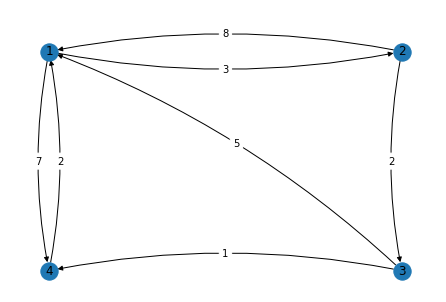

k=0
[[ 0.  3. inf  7.]
 [ 8.  0.  2. inf]
 [ 5. inf  0.  1.]
 [ 2. inf inf  0.]]

k=1
[[ 0.  3. inf  7.]
 [ 8.  0.  2. 15.]
 [ 5.  8.  0.  1.]
 [ 2.  5. inf  0.]]

k=2
[[ 0.  3.  5.  7.]
 [ 8.  0.  2. 15.]
 [ 5.  8.  0.  1.]
 [ 2.  5.  7.  0.]]

k=3
[[0. 3. 5. 6.]
 [7. 0. 2. 3.]
 [5. 8. 0. 1.]
 [2. 5. 7. 0.]]

k=4
[[0. 3. 5. 6.]
 [5. 0. 2. 3.]
 [3. 6. 0. 1.]
 [2. 5. 7. 0.]]

[[0. 3. 5. 6.]
 [5. 0. 2. 3.]
 [3. 6. 0. 1.]
 [2. 5. 7. 0.]]


In [5]:
G = nx.DiGraph()
G.add_weighted_edges_from(((1,2,3), (1,4,7), (2,1,8), (2,3,2), (3,1,5), (3,4,1), (4,1,2)))

# Establim les posicions de cada node de forma que ens quedi un quadrat
pos = {1: [0,1], 2:[1,1], 3:[1,0], 4:[0,0]}

# Dibuixem els nodes i les arestes
nx.draw(G,pos, with_labels=True, connectionstyle='arc3, rad = 0.1')

# Dibuixem els pesos
labels = nx.get_edge_attributes(G,'weight')
my_draw_networkx_edge_labels(G, pos, edge_labels=labels, rad=0.1, rotate=False)
plt.show()

id2index = {k: v for v, k in enumerate(sorted(G.nodes()))}
dist = floyd_wharsall(G, id2index)

print(dist)

# Cicles

Donat un graf $G$, un __cicle__ és un conjunt de nodes de $G$ connectats per arestes formant una cadena tancada:

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f6/Undirected_6_cycle.svg" alt="Cicle" />

<div class="alert alert-success">
<h1>Problema 2</h1>
<p>
    Implementeu un algorisme per a detectar si un graf conté, com a mínim, un cicle. <br>
    Per a facilitar lleugerament el problema, suposarem que el graf és <b>no dirigit</b> i té només <b>una component connexa</b>.
</p>    
        
</div>

In [6]:
# Observeu que ara el nostre DFS necessita un paràmetre extra: previous_node. 
# Aquest és el node amb el que cridem el DFS a la iteració següent.
def dfs_cycles(G, visited, current_node, previous_node):
    # Com sempre, visitem els nodes que no estiguin visitats
    if current_node not in visited:
        visited.add(current_node)
        # Per a cada veí del node actual comprovem si ja ha estat visitat
        for nei in G.neighbors(current_node):           
            # En el cas que no, seguim explorant amb el DFS.
            # Observeu que al cridar la funció, aprofitem per comprovar si ja s'ha trobat un cicle.
            # En cas que sigui així, acabem.
            if nei not in visited:
                if dfs_cycles(G, visited, nei, current_node):
                    return True           
            # Si el veí ja havia estat visitat, comprovem si es tracta d'un cicle.
            # Per fer-ho, s'ha de satisfer que el pare del node actual i el veí no coincideixin.
            # Si fóssin el mateix, vol dir que no es un cicle sino que es una aresta que estem
            # recorrent en ambdós sentits
            elif previous_node != nei:
                return True    
    # Si no s'ha trobat cap cicle, es retornarà False.
    return False
        
def cycles(G):
    # Triem un node qualsevol (estem suposant que el graf té una sola component connexa)
    n = list(G.nodes())[0]
    
    # Inicialitzem un conjunt on guardem els nodes que ja han estat visitats.
    visited = set()
    
    return dfs_cycles(G, visited, n, None)

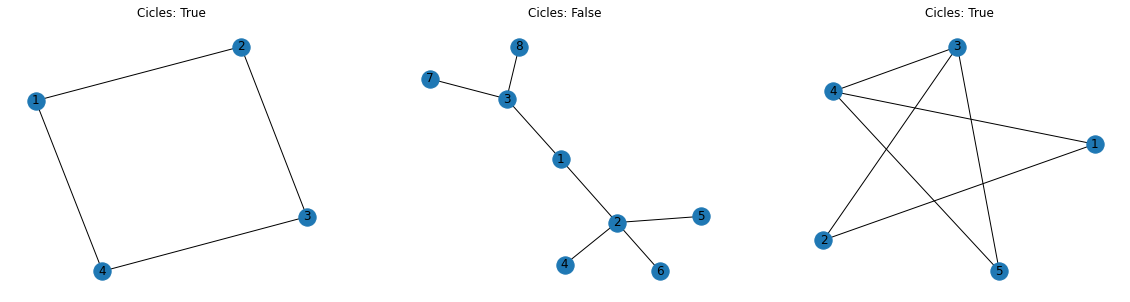

In [7]:
G1 = nx.Graph()
G1.add_edges_from(((1,2), (1,4), (2,1), (2,3), (4,3)))

G2 = nx.Graph()
G2.add_edges_from(((1,2), (1,3), (2,4), (2,5), (2,6), (3,7), (3,8)))

G3 = nx.Graph()
G3.add_edges_from(((1,2), (1,4), (2,1), (2,3), (4,3), (4,5), (3,5)))

fig, axs = plt.subplots(1,3,figsize=(20,5))
nx.draw(G1, with_labels=True, ax=axs[0])
axs[0].set_title(f'Cicles: {cycles(G1)}')

nx.draw(G2, with_labels=True, ax=axs[1])
axs[1].set_title(f'Cicles: {cycles(G2)}')

nx.draw(G3, with_labels=True, ax=axs[2])
axs[2].set_title(f'Cicles: {cycles(G3)}')

plt.show()